# Elliptic Dataset

##### Important Links:
- https://www.kaggle.com/datasets/ellipticco/elliptic-data-set
- https://medium.com/elliptic/the-elliptic-data-set-opening-up-machine-learning-on-the-blockchain-e0a343d99a14
- https://www.youtube.com/watch?v=HtJeXPr_PBY&t=571s

##### Papers to be referenced:
- Anti-Money Laundering in Bitcoin: Experimenting with Graph Convolutional Networks for Financial Forensics
- Machine learning methods to detect money laundering in the
Bitcoin blockchain in the presence of label scarcity

#### Desciption:
(Description copy pasted from Medium Website and https://www.kaggle.com/code/smlopezza/elliptic-data-set-eda-graphs-random-forest)
- The Elliptic Data Set is a sub-graph of the bitcoin graph, made of 203,769 nodes and 234,355 edges.
- 2% (4,545) of the nodes are labelled class1 (illicit); 21% (42,019) are labelled class2 (licit). No information is given on the other nodes, which are classified as “unknown”.
- Features: Each node has associated 166 features. 94 represent local information (timestep, number of inputs/outputs, transaction fee, output volume and aggregated figures) and 72 features represent aggregated features (obtained by aggregating transaction information such as maximum, minimum, standard deviation, correlation coefficients of neighbor transactions.
- Temporal Information: A time step is associated with each node, representing an stimated of the time when the transaction is confirmed. There are 49 distinct timesteps evenly spaced with an interval of 2 weeks.


#### Implementation:
- Data Cleaning
- EDA
- Model training and testing
    - ML Models
    - DL Models
- Performance Evaluation
- Comparisons and Visualisation


In [1]:
#IMPORTS:

import matplotlib.pyplot as plt
import matplotlib as mpl
import urllib.request
import pandas as pd
import urllib
import tarfile
import os
import networkx as nx
import numpy as np
np.random.seed(42)
import sklearn
import seaborn as sns # importing seaborn for the heatmap
import sys
assert sys.version_info >= (3, 5) # Python ≥3.5 is required

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB, ComplementNB, CategoricalNB, GaussianNB
from sklearn.cluster import KMeans 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from pyod.models.cblof import CBLOF
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from pyod.models.knn import KNN
from sklearn import preprocessing 
import itertools
from sklearn.metrics import matthews_corrcoef
from glob import glob 
import matplotlib.image as mpimg
from skimage.io import imread 
import tensorflow as tf
assert tf.__version__ >= "2.0"
from skimage import io
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from tensorflow.keras import regularizers
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Conv1D, MaxPooling1D
from keras.layers import LSTM, SimpleRNN
from keras.optimizers import Adam
from keras import Input # for instantiating a keras tensor
from sklearn.metrics import mean_squared_error # for model evaluation metrics
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, average_precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score
from tensorflow.keras.layers import (BatchNormalization, SeparableConv2D, Activation)
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from imblearn.pipeline import Pipeline
from collections import Counter
from numpy import where
from matplotlib import pyplot
from keras.utils import np_utils

- elliptic_txs_edgelist.csv contains graph edges information
- elliptic_txs_classes.csv contains information about legality of transactions
- elliptic_txs_features.csv contains information about transaction features

In [2]:
raw_features = pd.read_csv("C:/Users/HP/Desktop/elliptic_bitcoin_dataset/elliptic_txs_features.csv")

raw_classes = pd.read_csv("C:/Users/HP/Desktop/elliptic_bitcoin_dataset/elliptic_txs_classes.csv")

raw_edgelist = pd.read_csv("C:/Users/HP/Desktop/elliptic_bitcoin_dataset/elliptic_txs_edgelist.csv")

In [3]:
raw_features.isnull().any()

230425980               False
1                       False
-0.1714692896288031     False
-0.18466755143291433    False
-1.2013688016765636     False
                        ...  
-0.0874901561101501     False
-0.13115530389558736    False
-0.09752359377152515    False
-0.12061340670311574    False
-0.11979245961251665    False
Length: 167, dtype: bool

In [4]:
raw_classes.isnull().any()

txId     False
class    False
dtype: bool

In [5]:
raw_edgelist.isnull().any()

txId1    False
txId2    False
dtype: bool

In [6]:
raw_classes['class'].value_counts()

unknown    157205
2           42019
1            4545
Name: class, dtype: int64

In [7]:
raw_classes.loc[raw_classes['class'] == 'unknown', 'class'] = 3

In [8]:
local_features_col = ['local_feature_' + str(i+1) for i in range(93)]
agg_features_col = ['aggregate_features_' + str(i+1) for i in range(72)]

# raw_features.columns = ['txId', 'time step'] + ['local_feature_' + str(i+1) for i in range(93)] + ['aggregate_features_' + str(i+1) for i in range(72)]

raw_features.columns = ['txId', 'time step'] + local_features_col + agg_features_col

In [9]:
raw_features.head()

,txId,time step,local_feature_1,local_feature_2,local_feature_3,local_feature_4,local_feature_5,local_feature_6,local_feature_7,local_feature_8,...,aggregate_features_63,aggregate_features_64,aggregate_features_65,aggregate_features_66,aggregate_features_67,aggregate_features_68,aggregate_features_69,aggregate_features_70,aggregate_features_71,aggregate_features_72
0,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
2,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
3,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117
4,230459870,1,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,...,-0.504702,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540


## Exploratory Data Analysis (EDA)

array([<AxesSubplot:ylabel='txId'>], dtype=object)

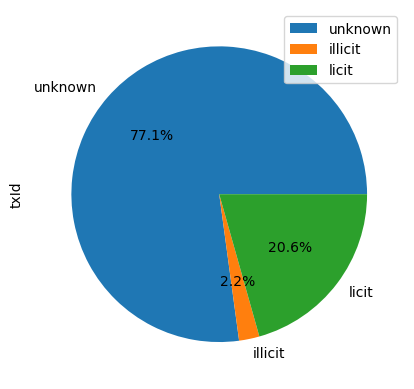

In [10]:
raw_classes.groupby(['class']).count().plot(kind='pie', labels=["unknown", "illicit", "licit"], autopct='%1.1f%%', subplots='True')

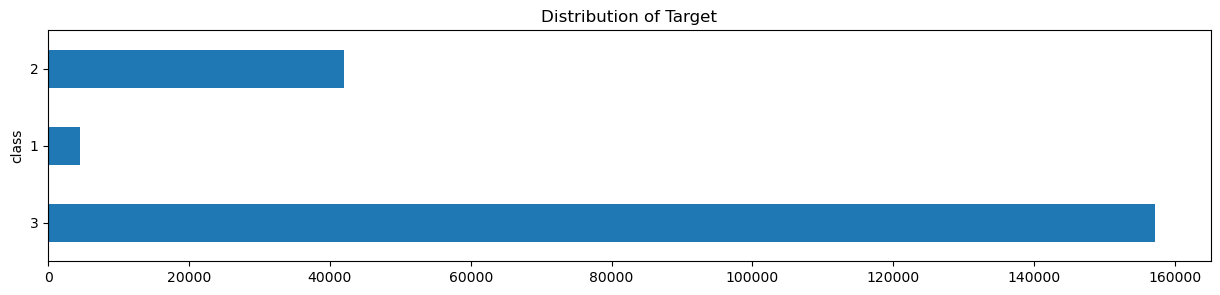

In [11]:
raw_classes.groupby('class') \
    .count()['txId'] \
    .plot(kind='barh',
          title='Distribution of Target',
          figsize=(15, 3))
plt.show()

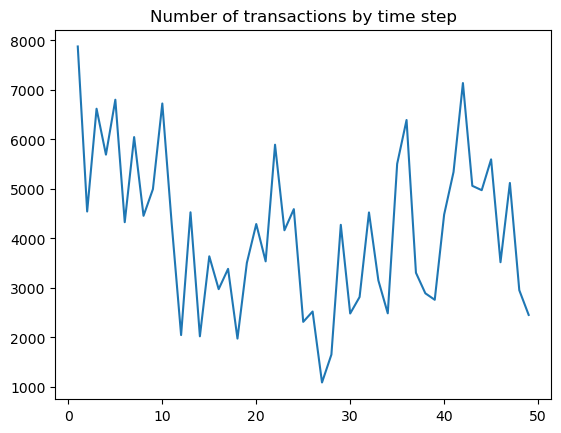

In [12]:
raw_features['time step'].value_counts().sort_index().plot();
plt.title('Number of transactions by time step');

In [13]:
# merge features with classes
class_features_df = pd.merge(raw_classes, raw_features, left_on='txId', right_on='txId', how='left')
class_features_df.head()

,txId,class,time step,local_feature_1,local_feature_2,local_feature_3,local_feature_4,local_feature_5,local_feature_6,local_feature_7,...,aggregate_features_63,aggregate_features_64,aggregate_features_65,aggregate_features_66,aggregate_features_67,aggregate_features_68,aggregate_features_69,aggregate_features_70,aggregate_features_71,aggregate_features_72
0,230425980,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5530458,3,1.0,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,3,1.0,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,232438397,2,1.0,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
4,230460314,3,1.0,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117


In [14]:
class_features_df.dropna(how="any", inplace=True)

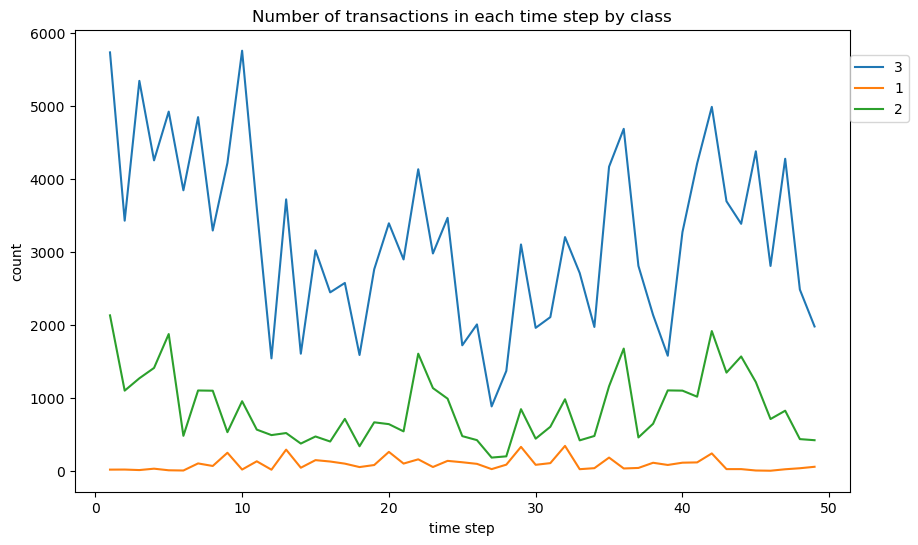

In [15]:
# Reference: https://www.kaggle.com/code/artgor/elliptic-data-eda

plt.figure(figsize=(10, 6))
grouped_df = class_features_df.groupby(['time step', 'class'])['txId'].count().reset_index().rename(columns={'txId': 'count'})
sns.lineplot(x='time step', y='count', hue='class', data=grouped_df);
plt.legend(loc=(1.0, 0.8));
plt.title('Number of transactions in each time step by class');

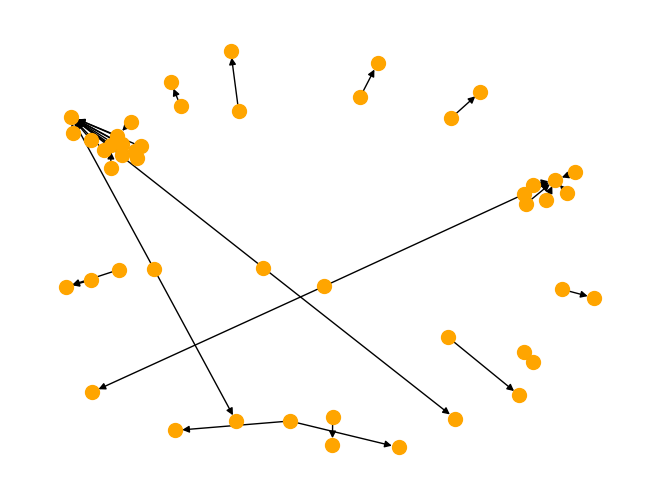

In [16]:
# illicit_ids = raw_features.loc[(raw_features['time step'] == 41) & (raw_features['class'] == '1'), 'txId']
# illicit_edges = raw_edgelist.loc[raw_edgelist['txId1'].isin(illicit_ids)]

# G = nx.from_pandas_edgelist(illicit_ids, source = 'txId1', target = 'txId2', create_using = nx.DiGraph())
# pos = nx.spring_layout(G)
# options = {"node_size": 100, "node_color": "orange"}
# nx.draw(G, with_labels=False, pos=pos, **options)

illicit_ids = class_features_df.loc[(class_features_df['time step'] == 41) & (class_features_df['class'] == '1'), 'txId']
illicit_edges = raw_edgelist.loc[raw_edgelist['txId1'].isin(illicit_ids)]

G = nx.from_pandas_edgelist(illicit_edges, source = 'txId1', target = 'txId2', 
                                create_using = nx.DiGraph())
options = {"node_size": 100, "node_color": "orange"}
pos = nx.spring_layout(G)
nx.draw(G, with_labels=False, pos=pos, **options)

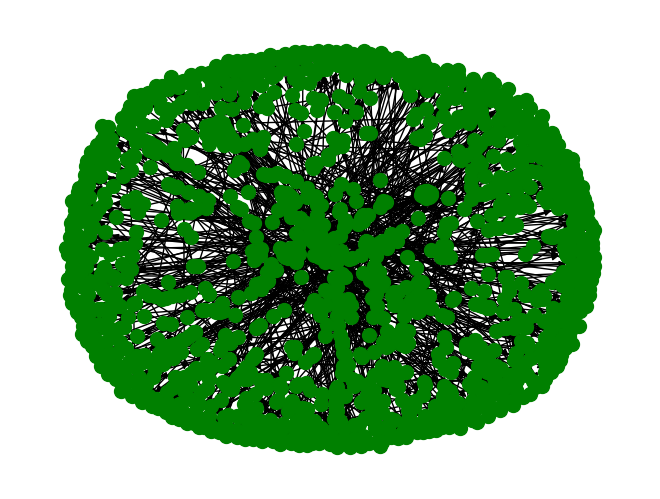

In [17]:
licit_ids = class_features_df.loc[(class_features_df['time step'] == 41) & (class_features_df['class'] == '2'), 'txId']
licit_edges = raw_edgelist.loc[raw_edgelist['txId1'].isin(licit_ids)]

G = nx.from_pandas_edgelist(licit_edges, source = 'txId1', target = 'txId2', create_using = nx.DiGraph())
pos = nx.spring_layout(G)
options = {"node_size": 100, "node_color": "green"}
nx.draw(G, with_labels=False, pos=pos, **options)

#### Normalisation and/or Standarization

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
# data_scaled = scaler.fit_transform(raw_features)

raw_features_scaled = raw_features.copy()
raw_features_scaled[local_features_col + agg_features_col] = pd.DataFrame(scaler.fit_transform(raw_features_scaled[local_features_col + agg_features_col]))

In [19]:
from sklearn.preprocessing import StandardScaler
zscore = StandardScaler() 
# data_zscore = scaler.fit_transform(data)

raw_features_zscore = raw_features.copy()
raw_features_zscore[local_features_col + agg_features_col] = pd.DataFrame(zscore.fit_transform(raw_features_zscore[local_features_col + agg_features_col]))

## Model Training and Testing

In [20]:
vc = raw_classes['class'].value_counts().to_frame().reset_index()
vc['percent'] = vc["class"].apply(lambda x : round(100*float(x) / len(raw_classes), 2))
vc = vc.rename(columns = {"index" : "Target", "class" : "Count"})
vc

,Target,Count,percent
0,3,157205,77.15
1,2,42019,20.62
2,1,4545,2.23


In [21]:
# Transactions that are of licit and illicit origin - classified dataset
classified = class_features_df[class_features_df['class'].isin(['1','2'])]
classified.head()

,txId,class,time step,local_feature_1,local_feature_2,local_feature_3,local_feature_4,local_feature_5,local_feature_6,local_feature_7,...,aggregate_features_63,aggregate_features_64,aggregate_features_65,aggregate_features_66,aggregate_features_67,aggregate_features_68,aggregate_features_69,aggregate_features_70,aggregate_features_71,aggregate_features_72
3,232438397,2,1.0,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
9,232029206,2,1.0,-0.005027,0.578941,-0.091383,4.380281,-0.063725,4.667146,0.851305,...,-0.577099,-0.613614,0.241128,0.241406,0.604120,0.008632,-0.131155,0.333211,-0.120613,-0.119792
10,232344069,2,1.0,-0.147852,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,-0.577099,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
11,27553029,2,1.0,-0.151357,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,-0.539735,-0.582077,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
16,3881097,2,1.0,-0.172306,-0.184668,-1.201369,0.028105,-0.043875,-0.029140,0.242712,...,-0.577099,-0.600999,0.241128,0.241406,0.018279,-0.068266,-0.084674,-0.054450,-1.760926,-1.760984


In [22]:
# X = classified.drop(columns=['txId', 'class', 'time step']) # drop class, text id and time step
X = classified[local_features_col + agg_features_col] 
y = classified[['class']]

# in this case, class 2 corresponds to licit transactions, we change this to 0 as our interest is the illicit transactions
y = y['class'].apply(lambda x: 0 if x == '2' else 1 )

### TSNE

In [21]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)

C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 46564 samples in 0.046s...
[t-SNE] Computed neighbors for 46564 samples in 13.412s...
[t-SNE] Computed conditional probabilities for sample 1000 / 46564
[t-SNE] Computed conditional probabilities for sample 2000 / 46564
[t-SNE] Computed conditional probabilities for sample 3000 / 46564
[t-SNE] Computed conditional probabilities for sample 4000 / 46564
[t-SNE] Computed conditional probabilities for sample 5000 / 46564
[t-SNE] Computed conditional probabilities for sample 6000 / 46564
[t-SNE] Computed conditional probabilities for sample 7000 / 46564
[t-SNE] Computed conditional probabilities for sample 8000 / 46564
[t-SNE] Computed conditional probabilities for sample 9000 / 46564
[t-SNE] Computed conditional probabilities for sample 10000 / 46564
[t-SNE] Computed conditional probabilities for sample 11000 / 46564
[t-SNE] Computed conditional probabilities for sample 12000 / 46564
[t-SNE] Computed conditional probabilities for sa

In [22]:
tsne_df = pd.DataFrame(columns=['tsne1','tsne2', 'class'], data = np.column_stack((tsne_scale_results, y)))

C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


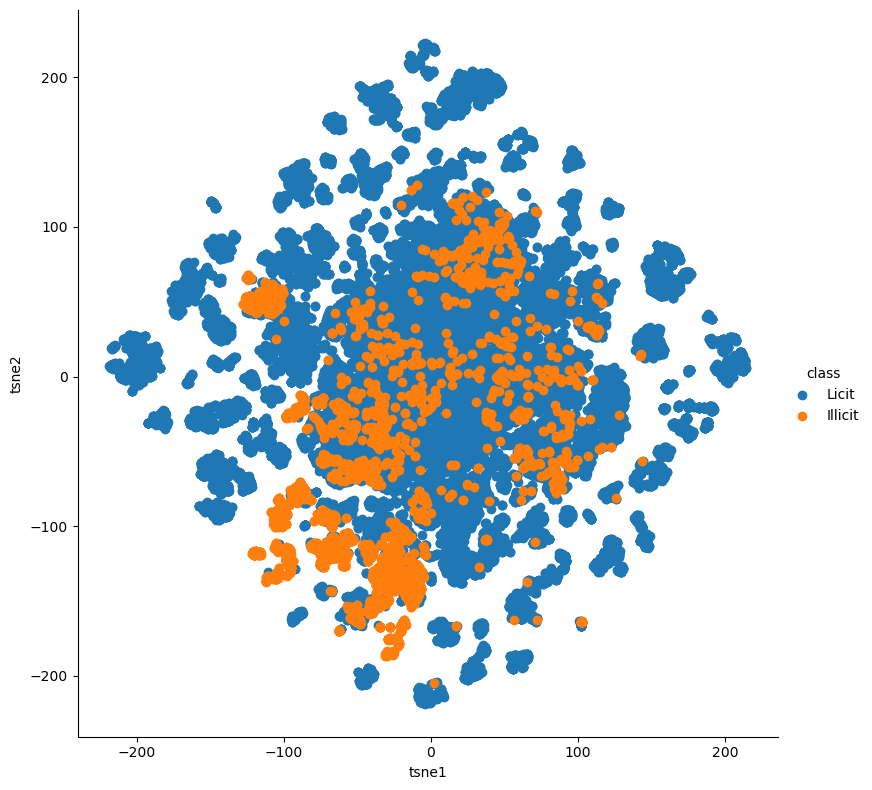

In [35]:
class_map = {0:'Licit',
            1: 'Illicit'}
tsne_df.loc[:, 'class'] = tsne_df['class'].map(class_map)

grid = sns.FacetGrid(tsne_df, hue="class", size=8)
grid.map(plt.scatter, 'tsne1', 'tsne2').add_legend()

#### Train-Test Split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15, shuffle=False)

In [24]:
#train and test dataframe on the different models

classes = np.array(['0','1'])
# CODE COPIED: https://towardsdatascience.com/unsupervised-learning-for-anomaly-detection-44c55a96b8c1
def plot_confusion_matrix(cm, classes,title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')


def train_test_models(model, X_train, Y_train, X_test, Y_test):

        accuracies = []

        #train model on data
        model.fit(X_train, Y_train)

        #find accuracy score
        y_pred = model.predict(X_test)
        acc = accuracy_score(Y_test, y_pred)
        print("Accuracy of %s is %s" % (model, acc))

        accuracies.append(acc)

        precision = precision_score(Y_test, y_pred, average='macro')
        print(f"Precision Score of the classifier %s is %s" %
              (model, precision))

        recall = recall_score(Y_test, y_pred, average='macro')
        print(f"Recall Score of the classifier %s is %s" %
              (model, recall))

        fscore = f1_score(Y_test, y_pred, average='macro')
        print(f"F1 Score of the classifier %s is %s" %
              (model, fscore))


        #find confusion matrix
        cm = confusion_matrix(Y_test, y_pred)
        plot_confusion_matrix(cm,["Licit", "Illicit"])


        print('\n\n')

        return accuracies  # a list of every models accuracy on the current dataset

### Supervised Learning

#### Random Forest

Accuracy of RandomForestClassifier() is 0.9778095919828204
Precision Score of the classifier RandomForestClassifier() is 0.9803011111338087
Recall Score of the classifier RandomForestClassifier() is 0.8289695940441066
F1 Score of the classifier RandomForestClassifier() is 0.8885589256614156





[0.9778095919828204]

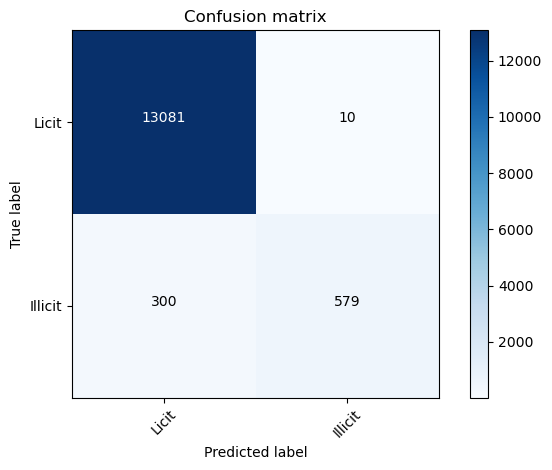

In [19]:
model_rf = RandomForestClassifier()
train_test_models(model_rf, X_train, y_train, X_test, y_test)

#### Logistic Regression

Accuracy of LogisticRegression(max_iter=3000) is 0.9294201861130995
Precision Score of the classifier LogisticRegression(max_iter=3000) is 0.7152434371738349
Recall Score of the classifier LogisticRegression(max_iter=3000) is 0.7898844780333065
F1 Score of the classifier LogisticRegression(max_iter=3000) is 0.7454909067231736





[0.9294201861130995]

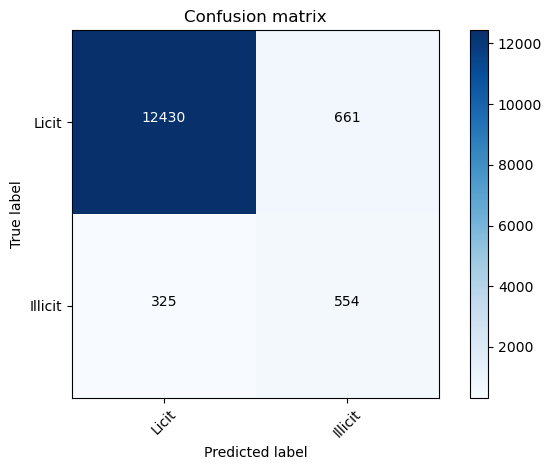

In [20]:
model_lr = LogisticRegression(solver='lbfgs', max_iter=3000)
train_test_models(model_lr, X_train, y_train, X_test, y_test)

#### Support Vector Machine

Accuracy of SVC(kernel='linear') is 0.941445955619184
Precision Score of the classifier SVC(kernel='linear') is 0.7520960695935204
Recall Score of the classifier SVC(kernel='linear') is 0.802138074521493
F1 Score of the classifier SVC(kernel='linear') is 0.7743054568045893





[0.941445955619184]

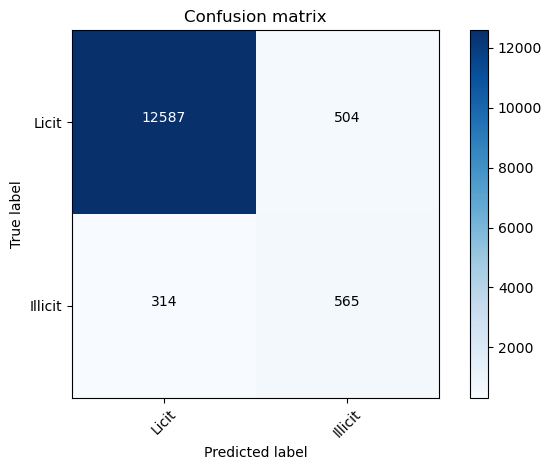

In [21]:
model_svm = svm.SVC(kernel='linear') # Linear Kernel
train_test_models(model_svm, X_train, y_train, X_test, y_test)

### Oversampling and Undersampling the Dataset

In [24]:
y_train_smote = y_train
X_train_smote = X_train

In [25]:
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.6)

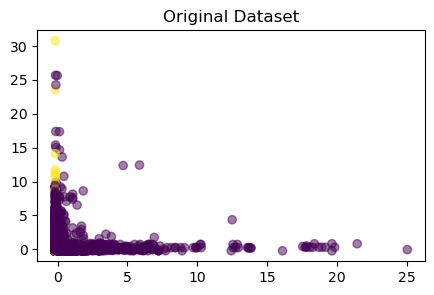

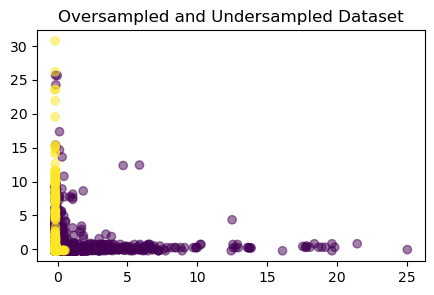

In [26]:
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
plt.figure(figsize=(5, 3))
plt.scatter(X_train_smote.iloc[:, 0], X_train_smote.iloc[:, 1], c=y_train_smote, alpha=0.5)
plt.title("Original Dataset")
plt.show()

X_train_smote, y_train_smote = pipeline.fit_resample(X_train_smote, y_train_smote)

plt.figure(figsize=(5, 3))
plt.scatter(X_train_smote.iloc[:, 0], X_train_smote.iloc[:, 1], c=y_train_smote, alpha=0.5)
plt.title("Oversampled and Undersampled Dataset")
plt.show()

#### SVM with Oversampling and Undersampling

Accuracy of SVC(kernel='linear') is 0.8982104509663564
Precision Score of the classifier SVC(kernel='linear') is 0.6623609839503374
Recall Score of the classifier SVC(kernel='linear') is 0.8045392239446827
F1 Score of the classifier SVC(kernel='linear') is 0.7033838124183852





[0.8982104509663564]

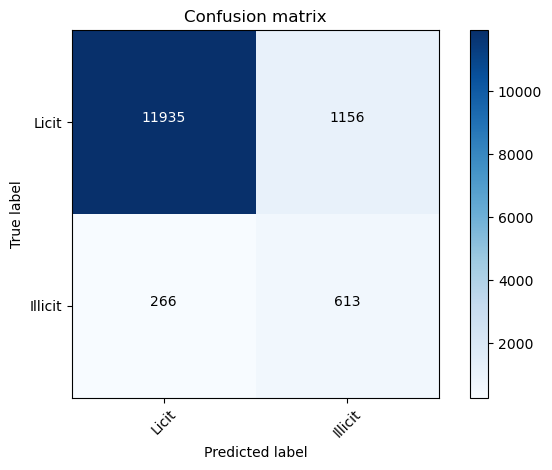

In [44]:
train_test_models(model_svm, X_train_smote, y_train_smote, X_test, y_test)

### Unsupervised Learning

#### Local Outlier Factor

Accuracy of LocalOutlierFactor(contamination=0.09) is 0.05561918396564066
Precision Score of the classifier LocalOutlierFactor(contamination=0.09) is 0.02037444933920705
Recall Score of the classifier LocalOutlierFactor(contamination=0.09) is 0.2946530147895336
F1 Score of the classifier LocalOutlierFactor(contamination=0.09) is 0.038113457435067326


C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.05561918396564066]

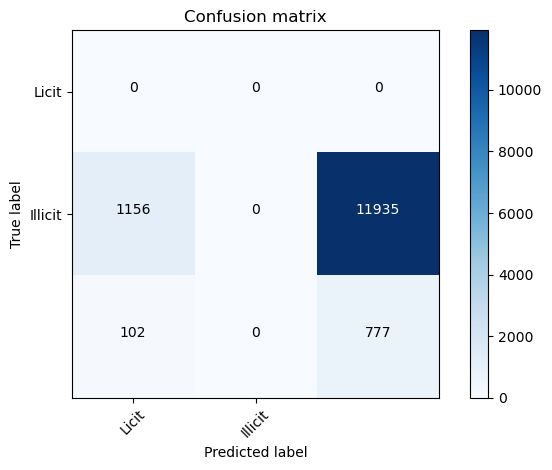

In [30]:
model_lof = LocalOutlierFactor(contamination=0.1)
train_test_models(model_lof, X_train, y_train, X_test, y_test)

#### K-Nearest Neighbor

The K-nearest neighbor algorithm, known as KNN or k-NN, probably is one of the most popular algorithms in machine learning. KNNs are typically used as a supervised learning technique where the target labels are provided. KNNs can also be used for the computation of the distance to the k neighbors. Because the latter does not use a target variable, some on-line sources such as the scikit-learn KNN [1] calls it unsupervised learning. The KNN in PyOD uses the latter. It computes the distance to the k neighbors and uses the distance to define the outlier scores.
https://medium.com/dataman-in-ai/anomaly-detection-with-pyod-b523fc47db9

C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\pyod\models\base.py:431: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Accuracy of KNN(algorithm='auto', contamination=0.09, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0) is 0.7689334287759485
Precision Score of the classifier KNN(algorithm='auto', contamination=0.09, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0) is 0.4697474938684905
Recall Score of the classifier KNN(algorithm='auto', contamination=0.09, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0) is 0.42673152811739024
F1 Score of the classifier KNN(algorithm='auto', contamination=0.09, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0) is 0.44394581897322394





[0.7689334287759485]

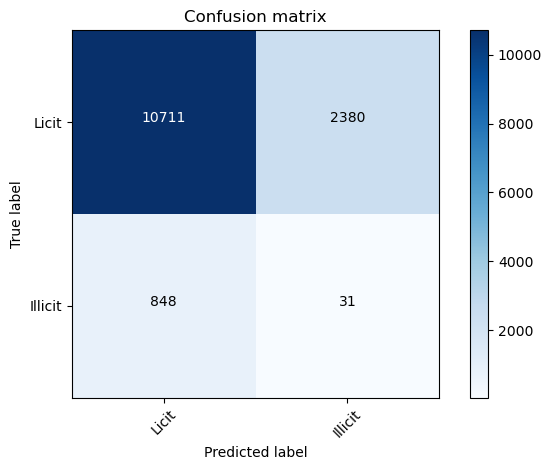

In [32]:
model_knn = KNN(contamination=0.1) 
train_test_models(model_knn, X_train, y_train, X_test, y_test)

#### Cluster-Based Local Outlier Factor

C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\pyod\models\base.py:431: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Accuracy of CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.1, n_clusters=8, n_jobs=None, random_state=None,
   use_weights=False) is 0.8236936292054402
Precision Score of the classifier CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.1, n_clusters=8, n_jobs=None, random_state=None,
   use_weights=False) is 0.4740272585207604
Recall Score of the classifier CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.1, n_clusters=8, n_jobs=None, random_state=None,
   use_weights=False) is 0.4543581731067962
F1 Score of the classifier CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.1, n_clusters=8, n_jobs=None, random_state=None,
   use_weights=False) is 0.4626713223551206





[0.8236936292054402]

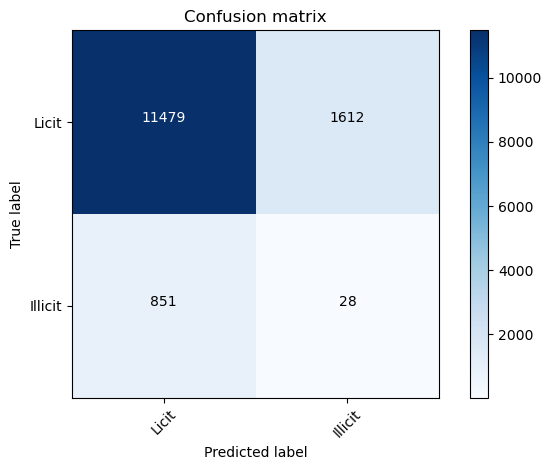

In [30]:
model_cblof = CBLOF(contamination = 0.1) 
train_test_models(model_cblof, X_train, y_train, X_test, y_test)

### Deep Learning Models

#### RNN

In [25]:
# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# reshape the data
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [26]:
# Define the RNN model
model1 = Sequential()
model1.add(LSTM(units=64, input_shape=(X_train.shape[1], 1), return_sequences=True))
model1.add(LSTM(units=32, return_sequences=False))
model1.add(Dense(units=1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) 

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 165, 64)           16896     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Train the RNN model
history = model1.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the RNN model
loss, accuracy = model1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

1019/1019 [==============================] - 193s 185ms/step - loss: 0.2952 - accuracy: 0.8946 - val_loss: 0.2356 - val_accuracy: 0.9371
Test loss: 0.2356056123971939
Test accuracy: 0.9370794296264648


In [32]:
# Predict on test data
y_pred = model1.predict(X_test).round()

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Print F1 score
print('F1 score:', f1)

437/437 [==============================] - 29s 64ms/step
F1 score: 0.0


#### Autoencoders

In [25]:
class_features_df.head()

,txId,class,time step,local_feature_1,local_feature_2,local_feature_3,local_feature_4,local_feature_5,local_feature_6,local_feature_7,...,aggregate_features_63,aggregate_features_64,aggregate_features_65,aggregate_features_66,aggregate_features_67,aggregate_features_68,aggregate_features_69,aggregate_features_70,aggregate_features_71,aggregate_features_72
1,5530458,3,1.0,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,3,1.0,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,232438397,2,1.0,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
4,230460314,3,1.0,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117
5,230459870,3,1.0,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,...,-0.504702,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540


In [26]:
class_features_df.dropna(how="any", inplace=True)

In [27]:
class_features_df2 = class_features_df.copy()
class_features_df2 = class_features_df2.rename(columns={"class":"class"})

In [28]:
class_features_df2.head()

,txId,class,time step,local_feature_1,local_feature_2,local_feature_3,local_feature_4,local_feature_5,local_feature_6,local_feature_7,...,aggregate_features_63,aggregate_features_64,aggregate_features_65,aggregate_features_66,aggregate_features_67,aggregate_features_68,aggregate_features_69,aggregate_features_70,aggregate_features_71,aggregate_features_72
1,5530458,3,1.0,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,3,1.0,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,232438397,2,1.0,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
4,230460314,3,1.0,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117
5,230459870,3,1.0,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,...,-0.504702,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540


In [29]:
new_df = class_features_df2.copy()
# You don't want the `Time` column.
new_df.pop('time step')
# You don't want the `txId` column.
new_df.pop('txId')

1           5530458
2         232022460
3         232438397
4         230460314
5         230459870
            ...    
203764    173077460
203765    158577750
203766    158375402
203767    158654197
203768    157597225
Name: txId, Length: 203768, dtype: int64

In [30]:
new_df['class'].replace({"1": "1"}, inplace=True)
new_df['class'].replace({"2": "0"}, inplace=True)
new_df.loc[new_df['class'] == 3, 'class'] = -1

In [31]:
new_df['class'] = pd.to_numeric(new_df['class'])

In [32]:
def rand_bin_array(K, N):
    arr = np.zeros(N,int)

    arr[:K]  = int( 1)
    np.random.shuffle(arr)
    return arr

In [33]:
class_0 = new_df[new_df['class']==0] # 1) Split "0" Class array 
class_1 = new_df[new_df['class']==1] # 1) Split "1" Class array 
class_minus_1 =new_df[new_df['class']==-1]  # 2) Split Class array "-1"

In [34]:
class_minus_1['class']=rand_bin_array(15720,157204)  # 3) Change Class array -1  target with a relation 1/10  Illicit-Licit

C:\Users\HP\AppData\Local\Temp\ipykernel_16776\2728927364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_minus_1['class']=rand_bin_array(15720,157204)  # 3) Change Class array -1  target with a relation 1/10  Illicit-Licit


In [35]:
tran_model = pd.concat([class_minus_1, class_0, class_1], axis=0) #4) Put together all Classes
tran_model = tran_model.sort_index()   # 5) Order again 
tran_model

,class,local_feature_1,local_feature_2,local_feature_3,local_feature_4,local_feature_5,local_feature_6,local_feature_7,local_feature_8,local_feature_9,...,aggregate_features_63,aggregate_features_64,aggregate_features_65,aggregate_features_66,aggregate_features_67,aggregate_features_68,aggregate_features_69,aggregate_features_70,aggregate_features_71,aggregate_features_72
1,0,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,-0.167948,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,0,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,-0.168576,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,0,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,-0.115831,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
4,0,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,0.041399,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117
5,1,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,0.038305,...,-0.504702,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203764,0,-0.145771,-0.163752,0.463609,-0.121970,-0.043875,-0.113002,-0.061584,-0.135803,-0.142008,...,-0.577099,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
203765,0,-0.165920,-0.123607,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.156418,-0.162334,...,0.162722,0.010822,1.461330,1.461369,-0.098889,-0.087490,-0.084674,-0.140597,-1.760926,-1.760984
203766,1,-0.172014,-0.078182,1.018602,0.028105,-0.043875,0.054722,-0.061584,-0.163626,-0.168778,...,1.261246,1.985050,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
203767,0,-0.172842,-0.176622,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.163501,-0.169317,...,-0.397749,-0.411776,1.461330,1.461369,-0.098889,-0.087490,-0.084674,-0.140597,1.519700,1.521399


In [36]:
y = tran_model['class']

In [37]:
data = tran_model.copy()

In [38]:
## input layer 
input_layer = Input(shape=(X.shape[1],))

## encoding part
encoded = Dense(200, activation='tanh', activity_regularizer=regularizers.l1(10e-3))(input_layer)
encoded = Dense(150, activation='relu')(encoded)
encoded = Dense(100, activation='relu')(encoded)
encoded = Dense(50, activation='relu')(encoded)

## decoding part
decoded = Dense(50, activation='tanh')(encoded)
decoded = Dense(100, activation='tanh')(encoded)
decoded = Dense(150, activation='tanh')(encoded)
decoded = Dense(200, activation='tanh')(decoded)

## output layer
output_layer = Dense(X.shape[1], activation='relu')(decoded)

In [39]:
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer="adadelta", loss="mse")

autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 165)]             0         
                                                                 
 dense (Dense)               (None, 200)               33200     
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 100)               15100     
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
 dense_6 (Dense)             (None, 150)               7650      
                                                                 
 dense_7 (Dense)             (None, 200)               30200 

In [40]:
x = data.drop(["class"], axis=1)
y = data["class"].values

x_scale = preprocessing.MinMaxScaler().fit_transform(x.values)
x_norm, x_fraud = x_scale[y == 0], x_scale[y == 1]

In [41]:
autoencoder.fit(x_norm[0:2000], x_norm[0:2000], 
                batch_size = 256, epochs = 20, 
                shuffle = True, validation_split = 0.20);

Epoch 1/20
7/7 [==============================] - 3s 56ms/step - loss: 0.6538 - val_loss: 0.6477
Epoch 2/20
7/7 [==============================] - 0s 17ms/step - loss: 0.6534 - val_loss: 0.6473
Epoch 3/20
7/7 [==============================] - 0s 17ms/step - loss: 0.6530 - val_loss: 0.6469
Epoch 4/20
7/7 [==============================] - 0s 17ms/step - loss: 0.6526 - val_loss: 0.6465
Epoch 5/20
7/7 [==============================] - 0s 17ms/step - loss: 0.6522 - val_loss: 0.6461
Epoch 6/20
7/7 [==============================] - 0s 16ms/step - loss: 0.6518 - val_loss: 0.6457
Epoch 7/20
7/7 [==============================] - 0s 14ms/step - loss: 0.6514 - val_loss: 0.6453
Epoch 8/20
7/7 [==============================] - 0s 15ms/step - loss: 0.6509 - val_loss: 0.6449
Epoch 9/20
7/7 [==============================] - 0s 14ms/step - loss: 0.6505 - val_loss: 0.6445
Epoch 10/20
7/7 [==============================] - 0s 14ms/step - loss: 0.6501 - val_loss: 0.6440
Epoch 11/20
7/7 [============

In [42]:
hidden_representation = Sequential()
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])

In [43]:
norm_hid_rep = hidden_representation.predict(x_norm[:4000])
fraud_hid_rep = hidden_representation.predict(x_fraud)

634/634 [==============================] - 1s 2ms/step


In [44]:
rep_x = np.append(norm_hid_rep, fraud_hid_rep, axis = 0)
y_n = np.zeros(norm_hid_rep.shape[0])
y_f = np.ones(fraud_hid_rep.shape[0])
rep_y = np.append(y_n, y_f)
train_x, val_x, train_y, val_y = train_test_split(rep_x, rep_y, test_size=0.25)

In [47]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(rep_x)

C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 24265 samples in 0.143s...
[t-SNE] Computed neighbors for 24265 samples in 21.495s...
[t-SNE] Computed conditional probabilities for sample 1000 / 24265
[t-SNE] Computed conditional probabilities for sample 2000 / 24265
[t-SNE] Computed conditional probabilities for sample 3000 / 24265
[t-SNE] Computed conditional probabilities for sample 4000 / 24265
[t-SNE] Computed conditional probabilities for sample 5000 / 24265
[t-SNE] Computed conditional probabilities for sample 6000 / 24265
[t-SNE] Computed conditional probabilities for sample 7000 / 24265
[t-SNE] Computed conditional probabilities for sample 8000 / 24265
[t-SNE] Computed conditional probabilities for sample 9000 / 24265
[t-SNE] Computed conditional probabilities for sample 10000 / 24265
[t-SNE] Computed conditional probabilities for sample 11000 / 24265
[t-SNE] Computed conditional probabilities for sample 12000 / 24265
[t-SNE] Computed conditional probabilities for sa

In [48]:
tsne_df_1 = pd.DataFrame(columns=['tsne1','tsne2', 'class'], data = np.column_stack((tsne_scale_results, rep_y)))

C:\Users\HP\anaconda3\envs\F21DL\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


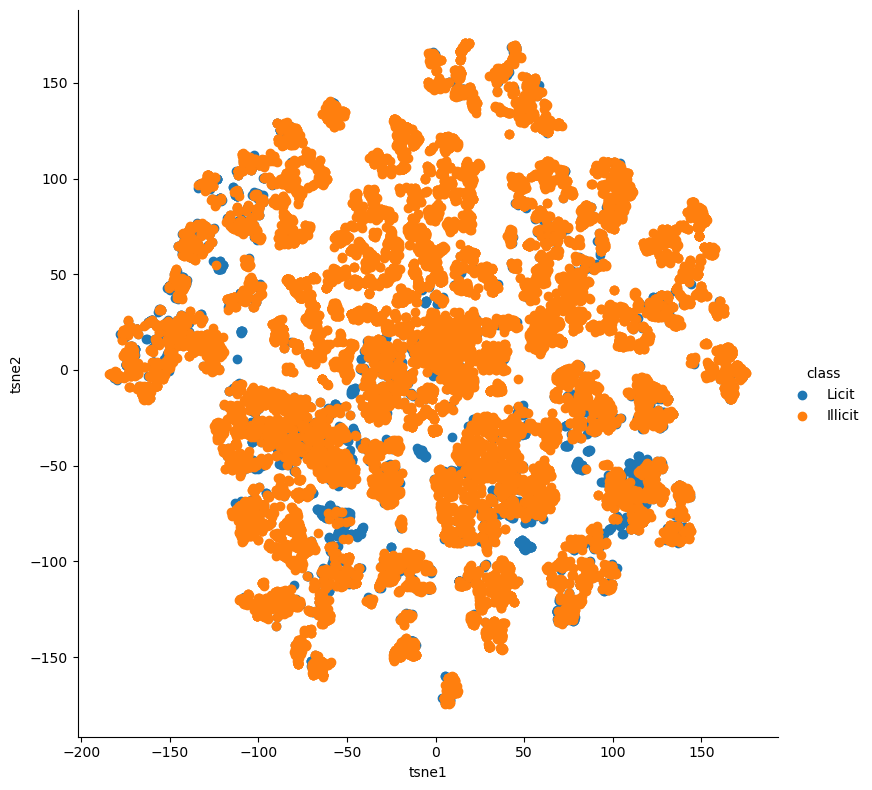

In [49]:
class_map = {0:'Licit',
            1: 'Illicit'}
# map targets to actual clothes for plotting
tsne_df_1.loc[:, 'class'] = tsne_df_1['class'].map(class_map)
grid = sns.FacetGrid(tsne_df_1, hue="class", size=8)
grid.map(plt.scatter, 'tsne1', 'tsne2').add_legend()

Accuracy of LogisticRegression(max_iter=3000) is 0.8852810285149167
Precision Score of the classifier LogisticRegression(max_iter=3000) is 0.810226779054744
Recall Score of the classifier LogisticRegression(max_iter=3000) is 0.7211393484324131
F1 Score of the classifier LogisticRegression(max_iter=3000) is 0.7536281604624329





[0.8852810285149167]

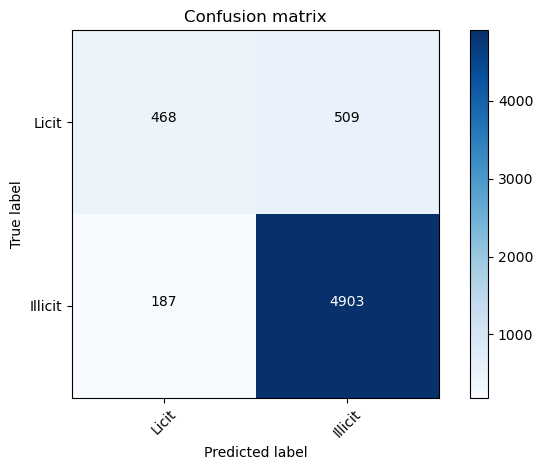

In [45]:
model_lr = LogisticRegression(solver='lbfgs', max_iter=3000)

train_test_models(model_lr, train_x, train_y, val_x, val_y)

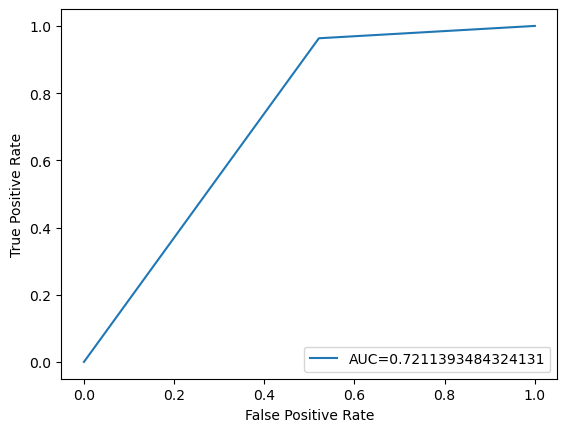

In [46]:
from sklearn import metrics

pred_y = model_lr.predict(val_x)
fpr, tpr, _ = metrics.roc_curve(val_y,pred_y)
auc = metrics.roc_auc_score(val_y,pred_y)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()